# Human Resource Analytics

Alexander Peltier & Gabriel Aracena.

### Performance vs. Predictors

Performance refers to measurable outcomes of specific actions in various contexts that are quantified by metrics like grades, rates, or returns. Predictors are variables that are thought to influence these outcomes - ranging from quantitative (e.g., years of experience) to qualitative factors (e.g., academic background). 

Predictive modeling lies in utilizing predictors to forecast performance, which employs statistical methods and machine learning algorithms to discern how different variables correlate with or causually affect outcomes.

In the specific context of this assignment, we have 35 data features (or components) that we are trying to analyze using PCA.

In [2]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.decomposition import PCA
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data/data.csv')

# Preprocessing

Encode categorical variables and standardize numerical variables.

In [4]:
# Remove columns with constant value
constant_columns = [col for col in df.columns if len(df[col].unique()) == 1]
df.drop(columns=constant_columns, inplace=True)

# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

# Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0             2               1               1                        2  ...   
1             1               1               2                        3  ...   
2             2               4               4                        4  ...   
3             4               1               5                        4  ...   
4             1               3               7                        1  ...   
...         ...             ...             ...                      ...  ...   
1465          2               3            2061                        3  ...   
1466          1               3            2062                        4  ...   
1467          3               1            2064                        2  ...   
1468          3               3            2065                        4  ...   
1469          3               3            2068                        2  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                 

## Data Manipulation
Some Columns were removed since they had constant value across all rows and were affecting variance testing because it has zero variance. Those columns were:
* EmployeeCount: Always 1
* Over18: Always Yes
* StanrdardHours: Always 80

You can verify that by seeing the table displayed above

## Sphericity (Bartlett Test of Sphericity for covariance matrices)
Checking Sphericity to see if the dataset is suitable to perform PCA on it

In [5]:
chi_square_value, p_value = calculate_bartlett_sphericity(df)

print(f"Chi-Squared Value: {chi_square_value}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The test is statistically significant. There is evidence of relationships among variables, suitable for PCA.")
else:
    print("The test is not statistically significant. There might not be enough evidence of relationships among variables for PCA.")

Chi-Squared Value: 14311.040222772273
P-Value: 0.0
The test is statistically significant. There is evidence of relationships among variables, suitable for PCA.


## Sample adequacy (Kaiser-Meyer-Olkin Measure of sampling adequacy test)
Calculating KMO value to check for PCA suitability

In [6]:
# Calculate KMO
kmo_all, kmo_model = calculate_kmo(df_scaled)

print(f"KMO Measure of Sampling Adequacy: {kmo_model}")

# Interpretation
if kmo_model < 0.5:
    print("Not suitable for factor analysis. KMO is too low.")
elif kmo_model < 0.6:
    print("Mediocre. Factor analysis may not be reliable.")
elif kmo_model < 0.7:
    print("Middling. Factor analysis could be considered.")
elif kmo_model < 0.8:
    print("Meritorious. Factor analysis is likely suitable.")
elif kmo_model < 0.9:
    print("Marvelous. Factor analysis is suitable.")
else:
    print("Superb. Factor analysis is highly suitable.")


KMO Measure of Sampling Adequacy: 0.7375628664928795
Meritorious. Factor analysis is likely suitable.


## Positive determinant of the matrix (det() function)
Lastly, we want to calculate the determinant of the matrix to verify if it is invertible and thus suitable for PCA analysis.

In [7]:
correlation_matrix = df_scaled.corr()

determinant = np.linalg.det(correlation_matrix)
print(f"Determinant of the Correlation Matrix: {determinant}")

# Interpretation
if determinant > 0:
    print("The matrix is positive definite and suitable for factor analysis or PCA.")
else:
    print("The matrix may not be suitable for factor analysis or PCA.")

Determinant of the Correlation Matrix: 5.4413649718790944e-05
The matrix is positive definite and suitable for factor analysis or PCA.


# CEV

In [8]:
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

Analysis of the CEV tells us that components past ~27 or so components retain no more data then if we include the rest of the components.

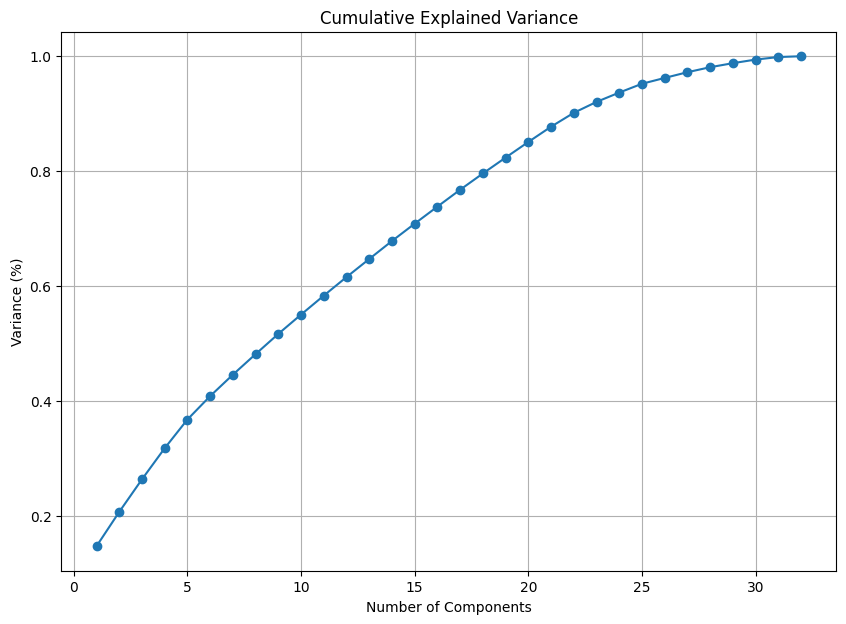

In [9]:
plt.figure(figsize=(10,7))
plt.plot(range(1, len(df_scaled.columns)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.grid(True)
plt.show()

# Feature Importance

In [10]:
# Predictor component is in index[1] which is Attrition.

component_index = 1  # Example: index of the component we're interested in

# Calculate absolute loadings for the specific component
feature_importance = np.abs(pca.components_[component_index])

# Get indices of the 8 most important features for the specific component
important_features_indices = np.argsort(feature_importance)[-8:]

# Extract the names of these important features
important_features = [df.columns[i] for i in important_features_indices]

print("Important Features for Component {}: {}".format(component_index, important_features))
print("Feature checked variance for: " + df.columns[component_index])


Important Features for Component 1: ['YearsInCurrentRole', 'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MaritalStatus', 'Department', 'JobRole', 'NumCompaniesWorked']
Feature checked variance for: Attrition


Analysis of feature importance tells us that the most important features by a large margin are:

- NumCompaniesWorked
- JobRole
- Department
- MaritalStatus
- Age
- YearsWithCurrManager
- StockOptionLevel
- YearsInCurrentRole

# Eigenvalue Scree Plot

The eigenvalue screen plot tells us how many principal components to keep during dimensionality reduction. Upon analysis, we can see that we come to the same conclusion earlier: only the first few components are important - the first component being the most important by a wide margin.

In [11]:
eigenvalues = pca.explained_variance_

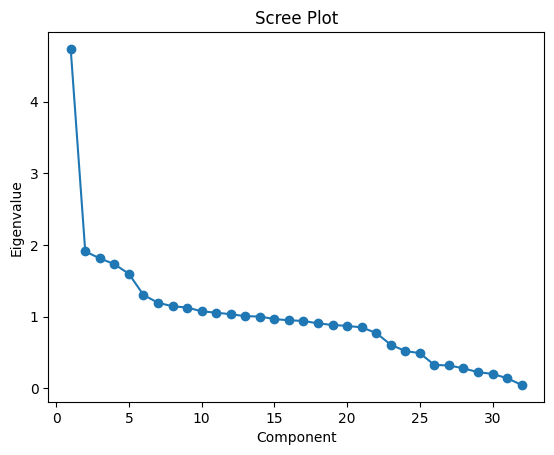

In [12]:
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

# Cronbach Alpha

A Cronbach Alpha of 0.47 suggests there is poor internal consistency in our data.

In [13]:
alpha = pg.cronbach_alpha(df_scaled)

print(f'Cronbach\'s alpha: {alpha[0]}')

Cronbach's alpha: 0.4729552627096929


# Correlation Matrix

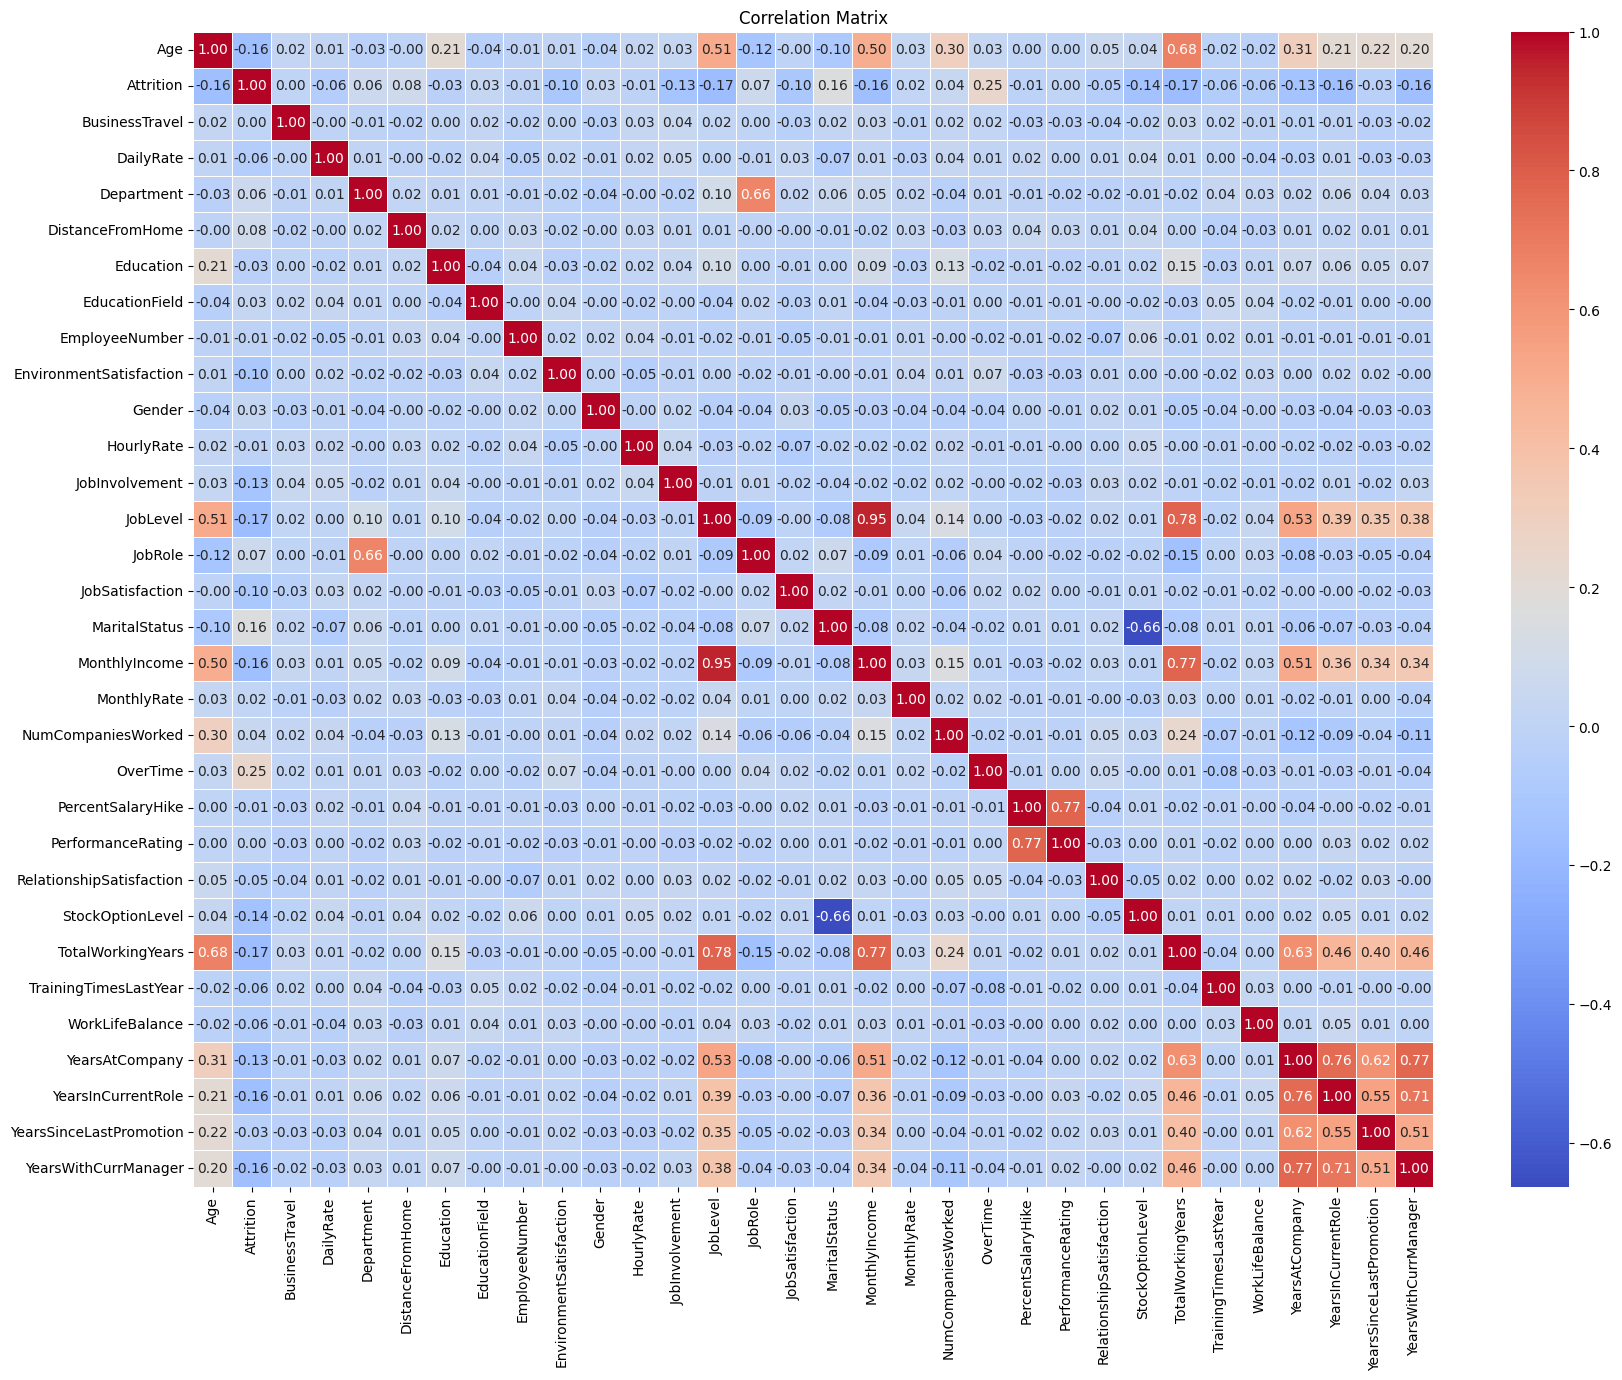

In [14]:
correlation_matrix = df_scaled.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation Matrix with only first 8 important components

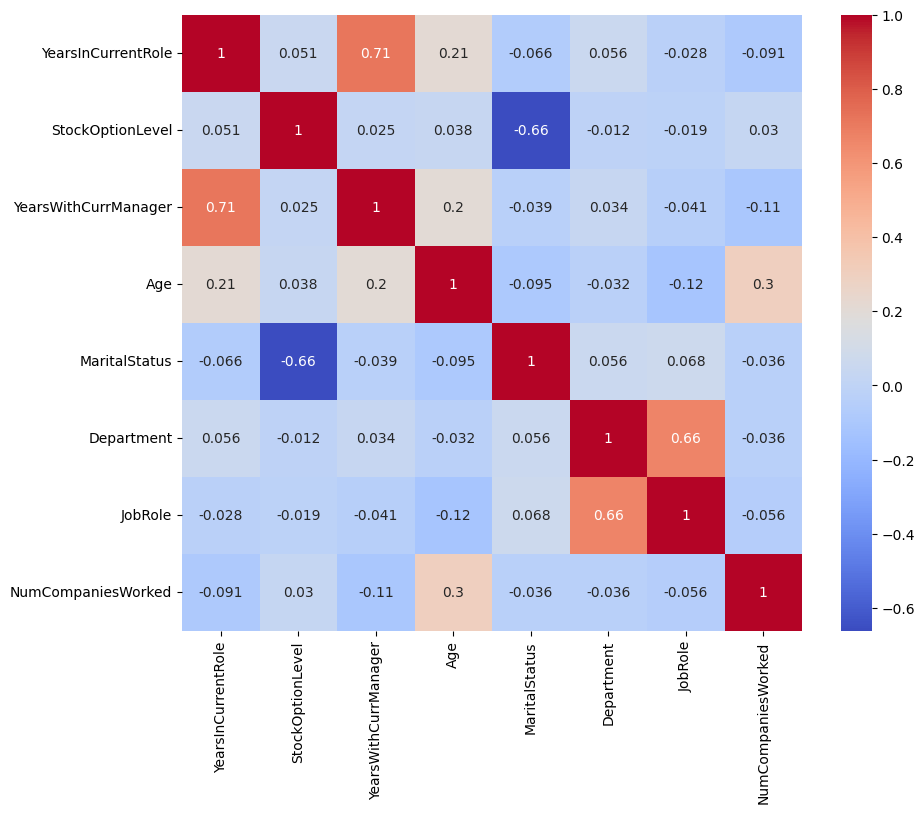

In [15]:
selected_columns = [
    'YearsInCurrentRole', 'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MaritalStatus', 'Department', 'JobRole', 'NumCompaniesWorked'
]

correlation_matrix = df_scaled[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Covariance Matrix

The covariance matrix tells us the covariance between a pair of variables: that is, the strength and direction of the relationship.

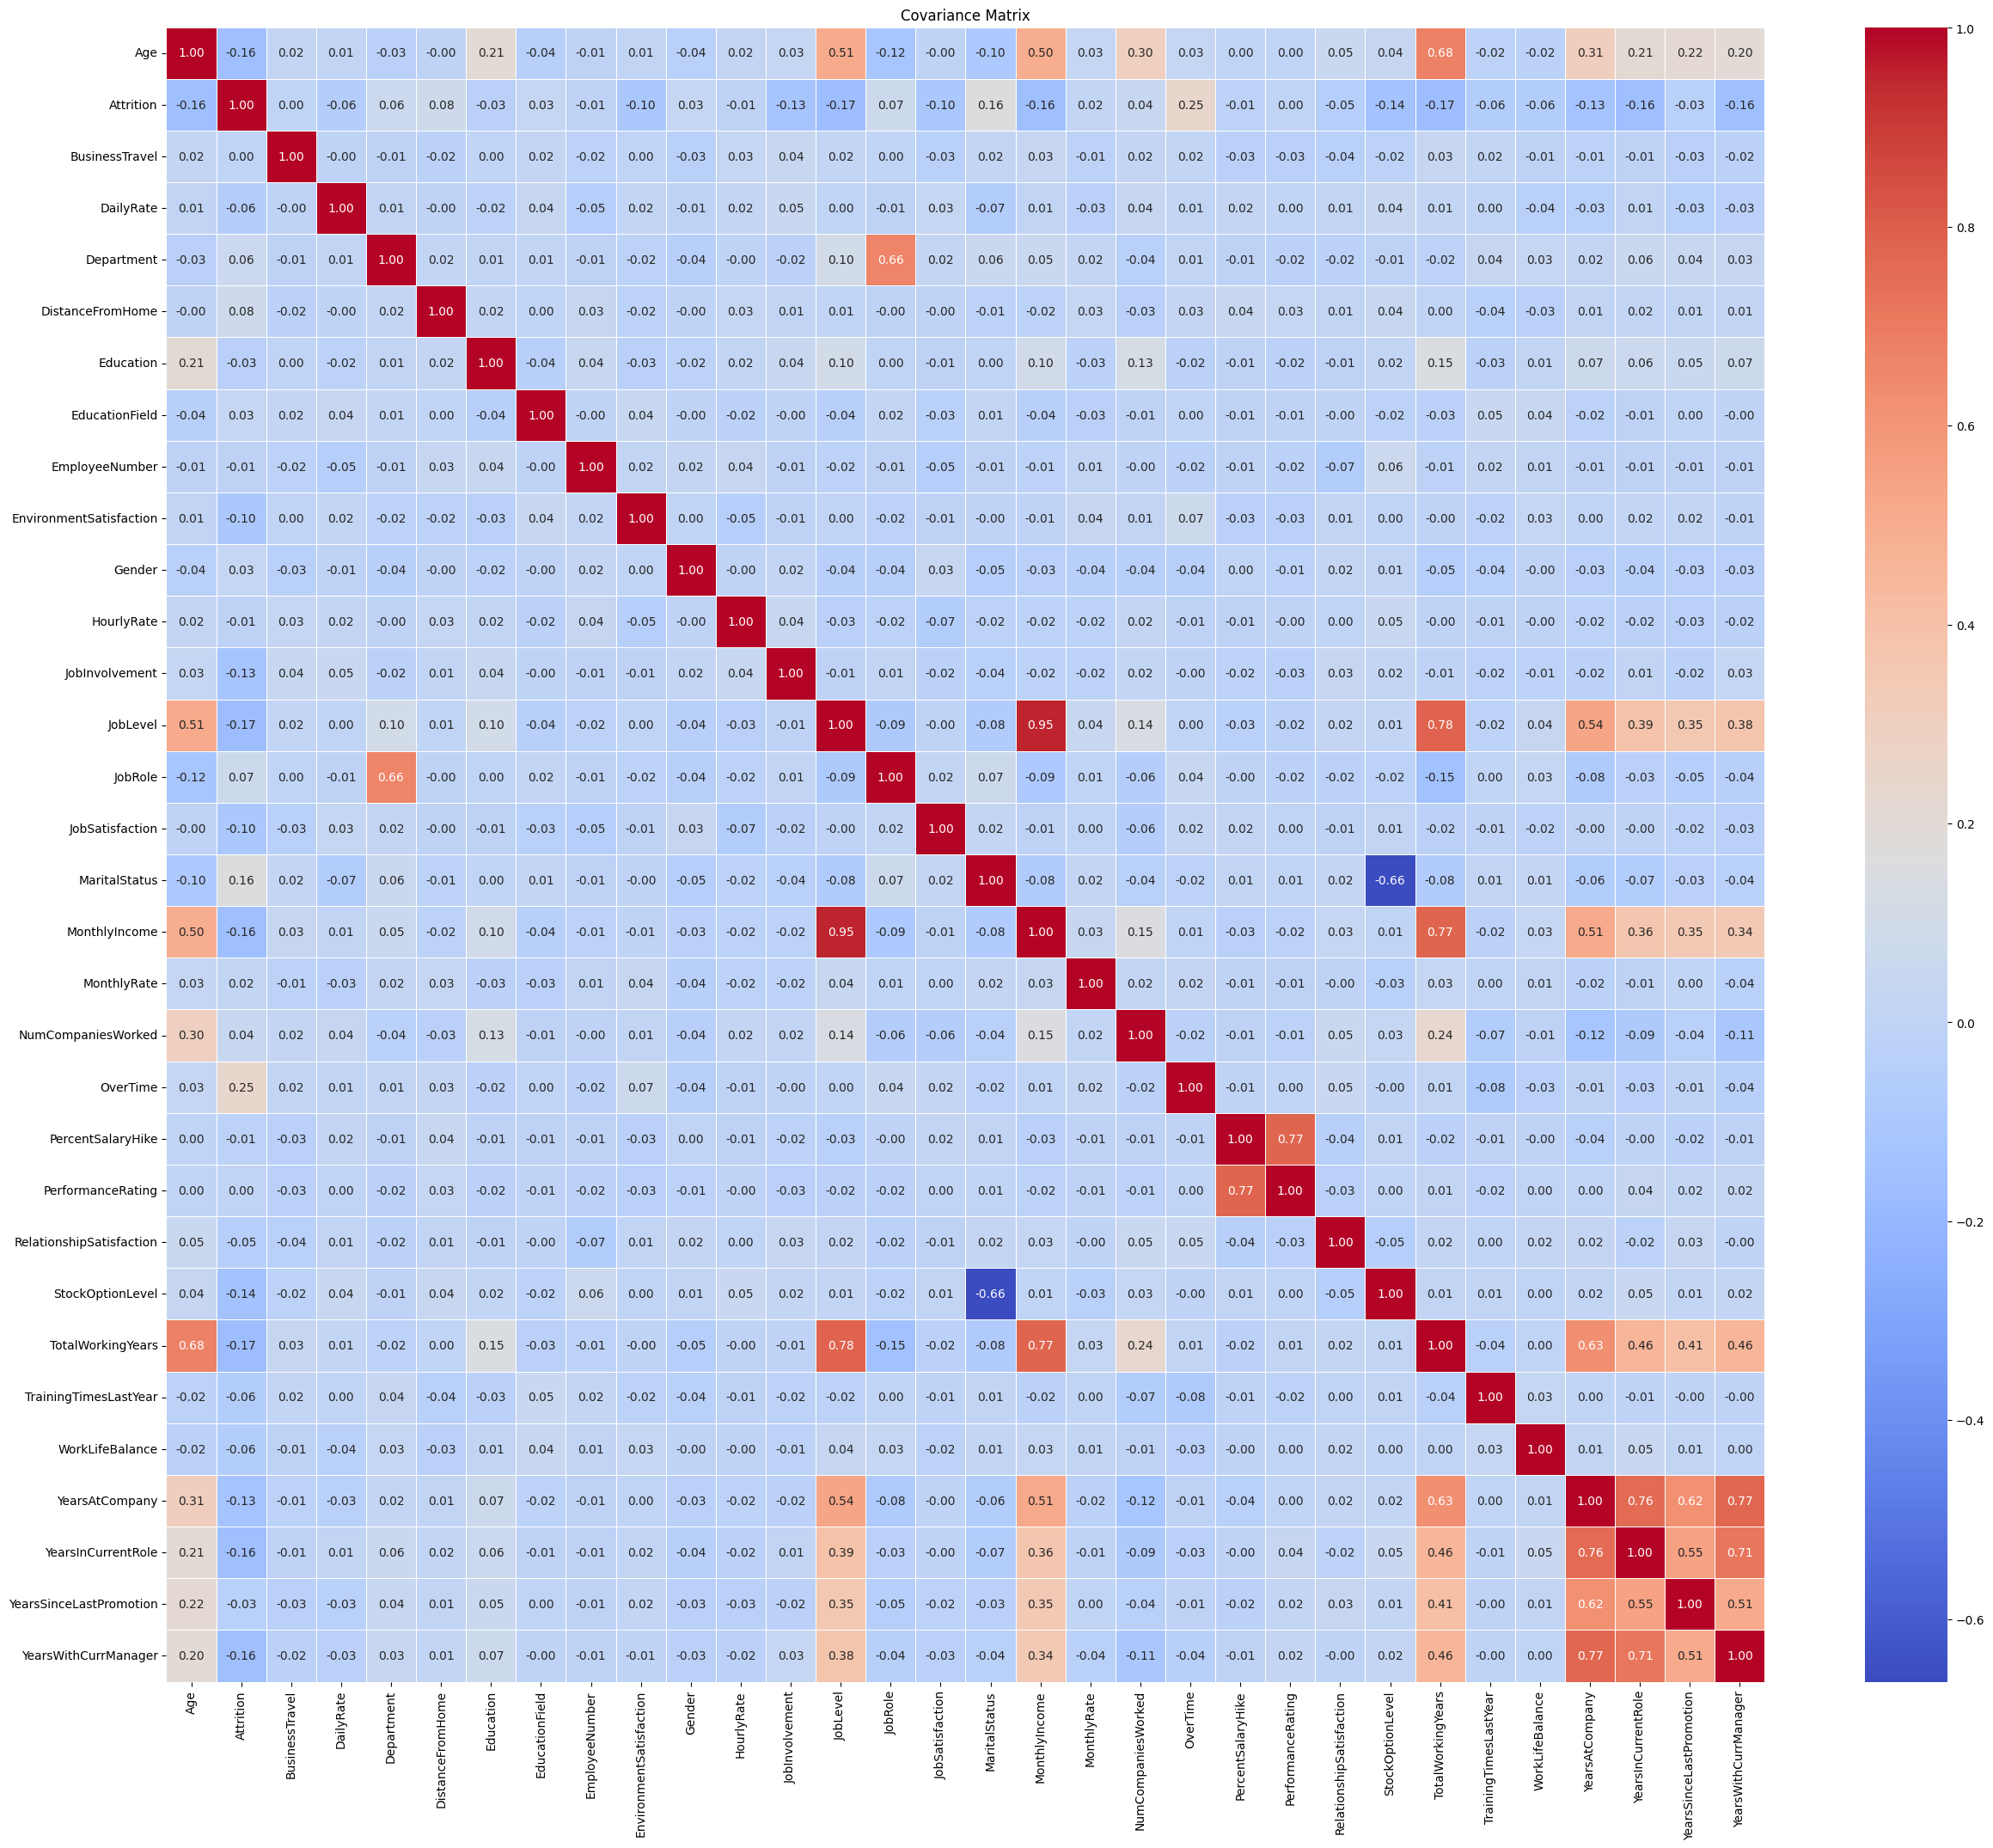

In [16]:
covariance_matrix = df_scaled.cov()

plt.figure(figsize=(30, 25))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Covariance Matrix')
plt.show()

In [17]:
correlations = pg.pairwise_corr(df_scaled, method='pearson')

# Correlation Coefficients & P-values

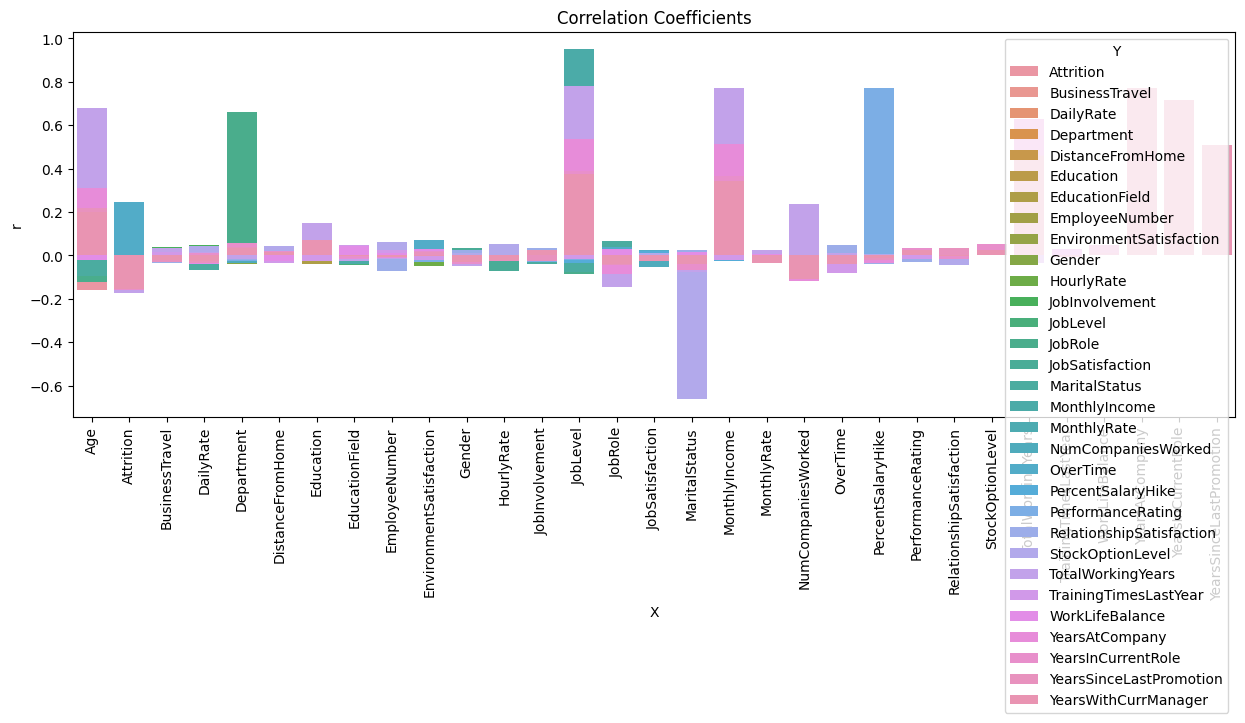

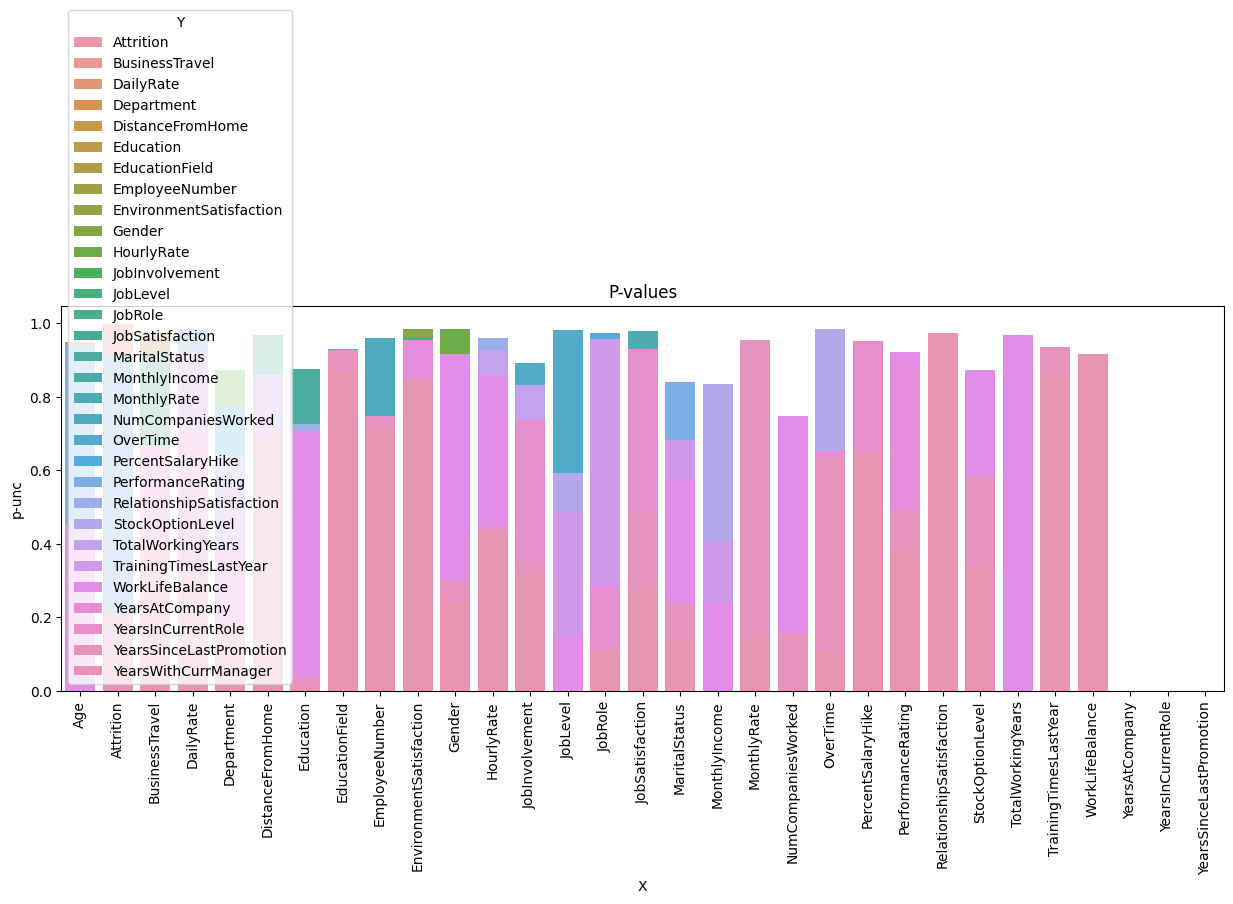

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(data=correlations, x='X', y='r', hue='Y', dodge=False)
plt.xticks(rotation=90)
plt.title('Correlation Coefficients')
plt.show()

# Plot p-values
plt.figure(figsize=(15, 5))
sns.barplot(data=correlations, x='X', y='p-unc', hue='Y', dodge=False)
plt.xticks(rotation=90)
plt.title('P-values')
plt.show()

# Component Structure Graphs

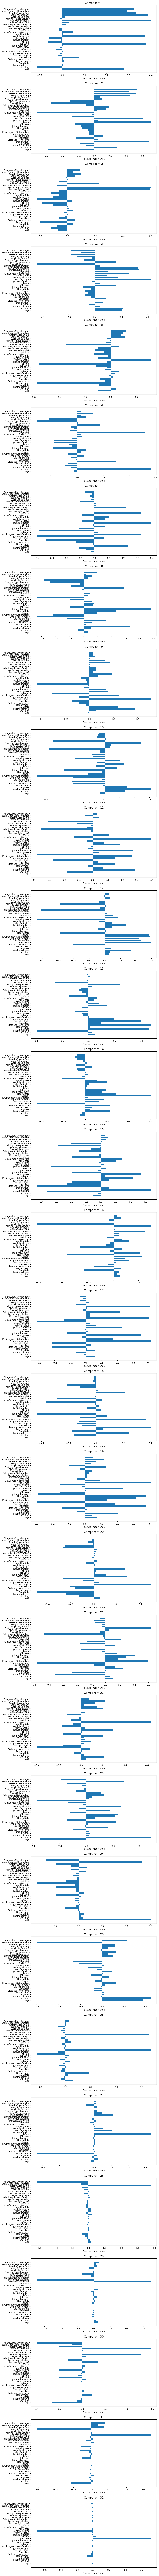

In [19]:
num_components = pca.n_components_
num_features = df.shape[1]

fig, axes = plt.subplots(num_components, 1, figsize=(10, num_components*5))

for i, ax in enumerate(axes):
    component = pca.components_[i]
    ax.barh(range(num_features), component)
    ax.set_yticks(range(num_features))
    ax.set_yticklabels(df.columns)
    ax.set_xlabel('Feature Importance')
    ax.set_title(f'Component {i+1}')

plt.tight_layout()
plt.show()

# Compute first principal component

In [20]:
X = df_scaled.values

weights = pca.components_[1]

first_component = np.dot(X, weights)

In [21]:
first_component

array([ 0.56770632,  0.99385112, -0.71061892, ..., -0.15436466,
        0.76976315, -0.65953469])

In [22]:
import numpy as np

weights = pca.components_[1]

min_weight = np.min(weights)
max_weight = np.max(weights)

weights_scaled = ((weights - min_weight) / (max_weight - min_weight)) * 100

In [23]:
weights_scaled

array([  9.67187845,  70.39330665,  43.58929491,  37.7704197 ,
        98.69132468,  53.76985982,  34.19098594,  57.67742189,
        45.58489773,  46.06291546,  44.74584064,  39.13429409,
        38.65489771,  33.52569668, 100.        ,  53.76330587,
        93.34008709,  30.7578361 ,  48.69233885,   0.        ,
        52.46387435,  60.98929181,  62.82758079,  43.46242458,
        12.76056414,  29.01233307,  57.37997302,  55.74613704,
        81.29572534,  87.24595197,  81.14154724,  88.02006745])

# First Component Histogram

The histogram for the first component illustrates a somewhat equal bell curve, meaning most of our data is projected equally to the left and right of the first principal component.

This might indicate that our data has symmetry.

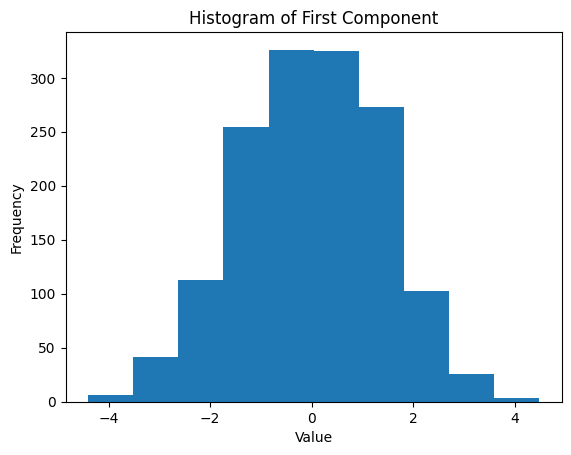

In [24]:
plt.hist(first_component, bins=10)
plt.title('Histogram of First Component')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Conclusion
The eigenvalue scree plot tells us how many principal components to keep during dimensionality reduction. Upon analysis, we can see that we come to the same conclusion earlier: only the first few components are important - the first component being the most important by a wide margin.

This finding suggests that most of the variance in the dataset can be captured by the features that are most important to the first component:
- NumCompaniesWorked
- JobRole
- Department
- MaritalStatus
- Age
- YearsWithCurrManager
- StockOptionLevel
- YearsInCurrentRole

With that highlighting the potential for reducing the dataset's dimensionality without losing substantial information. This is a crucial insight for further analysis, as it implies that simplifying the dataset to these principal components could still retain the essential characteristics needed for performance predictions.

In the specific context of this assignment, focusing on these principal components might help identify the most influental features that affect employee performance - helping the company guide strategy on delegating bonuses. 